# Train_test Results

## Connection to GoogleDrive

In [126]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Libraries installation

Run the following cells to install the libraries :

In [127]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [128]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [129]:
!pip install tokenizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [130]:
import torch, os
import datasets
import numpy as np
from torch.utils.data import DataLoader
from transformers import BertTokenizer,BertForSequenceClassification,AutoModelForSequenceClassification, AdamW
from progressbar import progressbar
from tqdm import tqdm
import seaborn as sns

## Importation of `train_test.py` file

In [147]:
%cd /content/drive/MyDrive/ANLP/projet_anlp

/content/drive/MyDrive/ANLP/projet_anlp


In [148]:
from train_test import *

## Training of the model on the different datasets of [miam](https://huggingface.co/datasets/miam)

Here are all the datasets with their number of uses that can be found on [Hugging Face](https://huggingface.co/datasets/miam) :

| Dataset name          | Language                                             | Train                    | Valid                    | Test                    |
|--------------------------|----------------------------------------------------|--------------------------|--------------------------|-------------------------|
| dihana                   | Spanish                                           | 19063                    | 2123                     |2361                     |     
| ilisten                  | Italian                                             | 1986                     | 230                      |971                      |    
| loria                    | French                                           | 8465                     | 942                      |1047                     |    
| maptask                  | English                                            | 25382                    | 5221                     |5335           |             
| vm2                      | German                                           | 25060                    | 2860                     |2855   |         


### Dataset `dihana`

In [ ]:
#Load Dataset
miam= '/content/drive/MyDrive/ANLP/projet_anlp/miam.py'
dataset = datasets.load_dataset('miam','dihana')

  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
num_labels = len(set(dataset['train']['Label']))

In [ ]:
#Import model et tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', return_tensors='pt')
model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-cased',num_labels=num_labels, problem_type="single_label_classification")

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch



---


Let's run the training and test with weighting :

In [ ]:
exec_train(model,tokenizer,datasets.concatenate_datasets([dataset['train'],dataset['validation']]),True)

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


tensor([1.5973, 1.6343, 1.3688, 1.1528, 1.3424, 2.5064, 2.0881, 1.7588, 1.2638,
        1.0000, 1.1031], device='cuda:0')


Training epoch 1: 100%|██████████| 663/663 [03:08<00:00,  3.51it/s, accuracy=0.912, loss=0.00905]


Test: 100%|██████████| 74/74 [00:06<00:00, 12.11it/s, accuracy=0.95]


test Acc: 0.950021177467175


<Axes: >

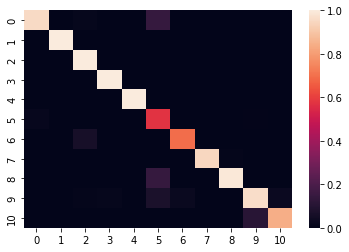

In [ ]:
M = exec_test(model,tokenizer,dataset['test'])
w = np.sum(M,axis=1)
for i in range(w.shape[0]):
    if w[i] == 0:
        w[i] = 1
sns.heatmap(M/w)



---


Let's compare without the weighting :

In [ ]:
exec_train(model,tokenizer,datasets.concatenate_datasets([dataset['train'],dataset['validation']]),False)

Training epoch 1: 100%|██████████| 663/663 [03:08<00:00,  3.52it/s, accuracy=0.941, loss=0.00549]


Test: 100%|██████████| 74/74 [00:06<00:00, 12.26it/s, accuracy=0.94]


test Acc: 0.940279542566709


<Axes: >

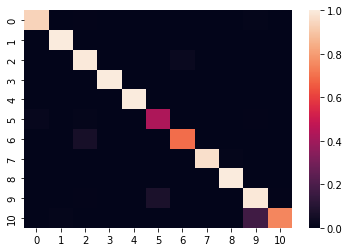

In [ ]:
M = exec_test(model,tokenizer,dataset['test'])
w = np.sum(M,axis=1)
for i in range(w.shape[0]):
    if w[i] == 0:
        w[i] = 1
sns.heatmap(M/w)

### Dataset `ilisten`

In [ ]:
#Load Dataset
miam= '/content/drive/MyDrive/ANLP/projet_anlp/miam.py'
dataset = datasets.load_dataset('miam','ilisten')

  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
num_labels = len(set(dataset['train']['Label']))

In [ ]:
#Import model et tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', return_tensors='pt')
model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-cased',num_labels=num_labels, problem_type="single_label_classification")


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

---


Let's run the training and test with weighting :

In [ ]:
exec_train(model,tokenizer,datasets.concatenate_datasets([dataset['train'],dataset['validation']]),True)

tensor([1.5694, 1.1515, 1.5211, 1.4302, 1.3847, 1.0631, 1.2911, 1.4651, 1.5383,
        1.0909, 1.0000, 1.7832, 1.4343, 1.0084, 1.7368], device='cuda:0')


Training epoch 1: 100%|██████████| 70/70 [00:20<00:00,  3.48it/s, accuracy=0.522, loss=0.0523]


Test: 100%|██████████| 31/31 [00:02<00:00, 11.69it/s, accuracy=0.708]


test Acc: 0.7075180226570545


<Axes: >

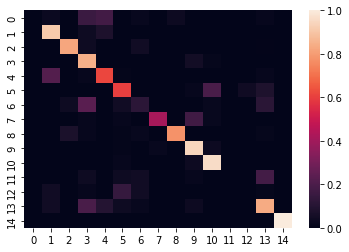

In [ ]:
M = exec_test(model,tokenizer,dataset['test'])
w = np.sum(M,axis=1)
for i in range(w.shape[0]):
    if w[i] == 0:
        w[i] = 1
sns.heatmap(M/w)


---


Let's compare without the weighting :

In [ ]:
exec_train(model,tokenizer,datasets.concatenate_datasets([dataset['train'],dataset['validation']]),False)

Training epoch 1: 100%|██████████| 70/70 [00:20<00:00,  3.48it/s, accuracy=0.772, loss=0.0231]


Test: 100%|██████████| 31/31 [00:02<00:00, 11.91it/s, accuracy=0.743]


test Acc: 0.7425334706488157


<Axes: >

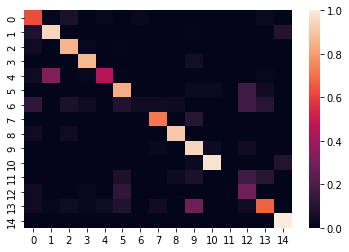

In [ ]:
M = exec_test(model,tokenizer,dataset['test'])
w = np.sum(M,axis=1)
for i in range(w.shape[0]):
    if w[i] == 0:
        w[i] = 1
sns.heatmap(M/w)

### Dataset `loria`

In [133]:
#Load Dataset
miam= '/content/drive/MyDrive/ANLP/projet_anlp/miam.py'
dataset = datasets.load_dataset('miam','loria')

  0%|          | 0/3 [00:00<?, ?it/s]

In [134]:
num_labels = len(set(dataset['train']['Label']))

In [135]:
#Import model et tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', return_tensors='pt')
model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-cased',num_labels=num_labels, problem_type="single_label_classification")


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

---


Let's run the training and test with weighting :

In [136]:
exec_train(model,tokenizer,datasets.concatenate_datasets([dataset['train'],dataset['validation']]),True)

tensor([1.4448, 1.0092, 2.4286, 2.1224, 2.2651, 1.1122, 1.7250, 1.0000, 4.2448,
        2.1753, 2.5944, 2.7512, 2.9711, 2.2214, 2.2728, 4.6977, 2.1061, 1.6950,
        1.6241, 1.7153, 2.2214, 1.0976, 4.4428, 3.1821, 3.3218, 3.4987, 3.4345,
        3.3218, 3.0015, 2.5110, 1.3183], device='cuda:0')




Training epoch 1:   0%|          | 0/294 [00:00<?, ?it/s]

Training epoch 1:   0%|          | 0/294 [00:00<?, ?it/s, accuracy=0, loss=0.109]

Training epoch 1:   0%|          | 1/294 [00:00<01:43,  2.83it/s, accuracy=0, loss=0.109]

Training epoch 1:   0%|          | 1/294 [00:00<01:43,  2.83it/s, accuracy=0.0312, loss=0.108]

Training epoch 1:   1%|          | 2/294 [00:00<01:31,  3.21it/s, accuracy=0.0312, loss=0.108]

Training epoch 1:   1%|          | 2/294 [00:00<01:31,  3.21it/s, accuracy=0.104, loss=0.107] 

Training epoch 1:   1%|          | 3/294 [00:00<01:27,  3.32it/s, accuracy=0.104, loss=0.107]

Training epoch 1:   1%|          | 3/294 [00:01<01:27,  3.32it/s, accuracy=0.117, loss=0.105]

Training epoch 1:   1%|▏         | 4/294 [00:01<01:25,  3.40it/s, accuracy=0.117, loss=0.105]

Training epoch 1:   1%|▏         | 4/294 [00:01<01:25,  3.40it/s, accuracy=0.163, loss=0.103]

Training epoch 1:   2%|▏         | 5/294 [00:01<01:24,  3.42it/s, accuracy=0.163, loss=0.103]

Tr



Test:   0%|          | 0/33 [00:00<?, ?it/s]

Test:   0%|          | 0/33 [00:00<?, ?it/s, accuracy=0.625]

Test:   3%|▎         | 1/33 [00:00<00:04,  6.48it/s, accuracy=0.719]

Test:   6%|▌         | 2/33 [00:00<00:02, 12.81it/s, accuracy=0.719]

Test:   6%|▌         | 2/33 [00:00<00:02, 12.81it/s, accuracy=0.729]

Test:   9%|▉         | 3/33 [00:00<00:02, 12.81it/s, accuracy=0.727]

Test:  12%|█▏        | 4/33 [00:00<00:02, 12.20it/s, accuracy=0.727]

Test:  12%|█▏        | 4/33 [00:00<00:02, 12.20it/s, accuracy=0.731]

Test:  15%|█▌        | 5/33 [00:00<00:02, 12.20it/s, accuracy=0.729]

Test:  18%|█▊        | 6/33 [00:00<00:02, 12.06it/s, accuracy=0.729]

Test:  18%|█▊        | 6/33 [00:00<00:02, 12.06it/s, accuracy=0.719]

Test:  21%|██        | 7/33 [00:00<00:02, 12.06it/s, accuracy=0.703]

Test:  24%|██▍       | 8/33 [00:00<00:02, 11.92it/s, accuracy=0.703]

Test:  24%|██▍       | 8/33 [00:00<00:02, 11.92it/s, accuracy=0.701]

Test:  27%|██▋       | 9/33 [00:00<00:02, 11.92it/

test Acc: 0.7631327602674307


<Axes: >

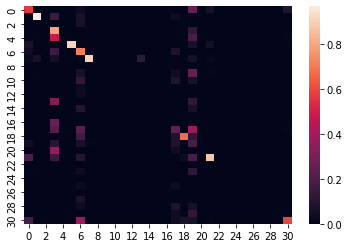

In [137]:
M = exec_test(model,tokenizer,dataset['test'])
w = np.sum(M,axis=1)
for i in range(w.shape[0]):
    if w[i] == 0:
        w[i] = 1
sns.heatmap(M/w)

---


Let's compare without the weighting :

In [138]:
exec_train(model,tokenizer,datasets.concatenate_datasets([dataset['train'],dataset['validation']]),False)



Training epoch 1:   0%|          | 0/294 [00:00<?, ?it/s]

Training epoch 1:   0%|          | 0/294 [00:00<?, ?it/s, accuracy=0.625, loss=0.0427]

Training epoch 1:   0%|          | 1/294 [00:00<01:45,  2.77it/s, accuracy=0.625, loss=0.0427]

Training epoch 1:   0%|          | 1/294 [00:00<01:45,  2.77it/s, accuracy=0.625, loss=0.0445]

Training epoch 1:   1%|          | 2/294 [00:00<01:31,  3.18it/s, accuracy=0.625, loss=0.0445]

Training epoch 1:   1%|          | 2/294 [00:00<01:31,  3.18it/s, accuracy=0.625, loss=0.0473]

Training epoch 1:   1%|          | 3/294 [00:00<01:27,  3.34it/s, accuracy=0.625, loss=0.0473]

Training epoch 1:   1%|          | 3/294 [00:01<01:27,  3.34it/s, accuracy=0.633, loss=0.0447]

Training epoch 1:   1%|▏         | 4/294 [00:01<01:24,  3.41it/s, accuracy=0.633, loss=0.0447]

Training epoch 1:   1%|▏         | 4/294 [00:01<01:24,  3.41it/s, accuracy=0.65, loss=0.0405] 

Training epoch 1:   2%|▏         | 5/294 [00:01<01:24,  3.43it/s, accuracy=0.65, lo



Test:   0%|          | 0/33 [00:00<?, ?it/s]

Test:   0%|          | 0/33 [00:00<?, ?it/s, accuracy=0.75]

Test:   3%|▎         | 1/33 [00:00<00:05,  6.37it/s, accuracy=0.812]

Test:   6%|▌         | 2/33 [00:00<00:02, 12.59it/s, accuracy=0.812]

Test:   6%|▌         | 2/33 [00:00<00:02, 12.59it/s, accuracy=0.823]

Test:   9%|▉         | 3/33 [00:00<00:02, 12.59it/s, accuracy=0.828]

Test:  12%|█▏        | 4/33 [00:00<00:02, 12.10it/s, accuracy=0.828]

Test:  12%|█▏        | 4/33 [00:00<00:02, 12.10it/s, accuracy=0.819]

Test:  15%|█▌        | 5/33 [00:00<00:02, 12.10it/s, accuracy=0.792]

Test:  18%|█▊        | 6/33 [00:00<00:02, 12.05it/s, accuracy=0.792]

Test:  18%|█▊        | 6/33 [00:00<00:02, 12.05it/s, accuracy=0.79] 

Test:  21%|██        | 7/33 [00:00<00:02, 12.05it/s, accuracy=0.777]

Test:  24%|██▍       | 8/33 [00:00<00:02, 12.04it/s, accuracy=0.777]

Test:  24%|██▍       | 8/33 [00:00<00:02, 12.04it/s, accuracy=0.778]

Test:  27%|██▋       | 9/33 [00:00<00:01, 12.04it/s

test Acc: 0.8013371537726839


<Axes: >

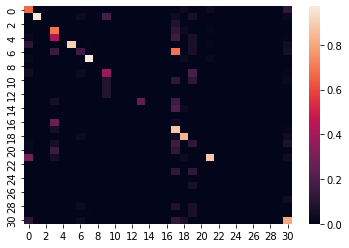

In [139]:
M = exec_test(model,tokenizer,dataset['test'])
w = np.sum(M,axis=1)
for i in range(w.shape[0]):
    if w[i] == 0:
        w[i] = 1
sns.heatmap(M/w)

### Dataset `maptask`

In [149]:
#Load Dataset
miam= '/content/drive/MyDrive/ANLP/projet_anlp/miam.py'
dataset = datasets.load_dataset('miam','maptask')

  0%|          | 0/3 [00:00<?, ?it/s]

In [150]:
num_labels = len(set(dataset['train']['Label']))

In [151]:
#Import model et tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', return_tensors='pt')
model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-cased',num_labels=num_labels, problem_type="single_label_classification")


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

---


Let's run the training and test with weighting :

In [152]:
exec_train(model,tokenizer,datasets.concatenate_datasets([dataset['train'],dataset['validation']]),True)

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


tensor([1.0000, 1.3199, 1.2670, 1.4787, 1.2596, 1.0711, 1.6285, 1.3283, 1.2698,
        1.5738, 1.5614, 1.1391], device='cuda:0')




Training epoch 1:   0%|          | 0/957 [00:00<?, ?it/s]

Training epoch 1:   0%|          | 0/957 [00:00<?, ?it/s, accuracy=0.0625, loss=0.0792]

Training epoch 1:   0%|          | 1/957 [00:00<05:44,  2.77it/s, accuracy=0.0625, loss=0.0792]

Training epoch 1:   0%|          | 1/957 [00:00<05:44,  2.77it/s, accuracy=0.125, loss=0.0783] 

Training epoch 1:   0%|          | 2/957 [00:00<04:55,  3.23it/s, accuracy=0.125, loss=0.0783]

Training epoch 1:   0%|          | 2/957 [00:00<04:55,  3.23it/s, accuracy=0.229, loss=0.077] 

Training epoch 1:   0%|          | 3/957 [00:00<04:40,  3.40it/s, accuracy=0.229, loss=0.077]

Training epoch 1:   0%|          | 3/957 [00:01<04:40,  3.40it/s, accuracy=0.25, loss=0.0761]

Training epoch 1:   0%|          | 4/957 [00:01<04:33,  3.48it/s, accuracy=0.25, loss=0.0761]

Training epoch 1:   0%|          | 4/957 [00:01<04:33,  3.48it/s, accuracy=0.256, loss=0.0753]

Training epoch 1:   1%|          | 5/957 [00:01<04:33,  3.49it/s, accuracy=0.256, l

Map:   0%|          | 0/5335 [00:00<?, ? examples/s]

Test: 100%|██████████| 167/167 [00:13<00:00, 12.06it/s, accuracy=0.561]


test Acc: 0.5610121836925961


<Axes: >

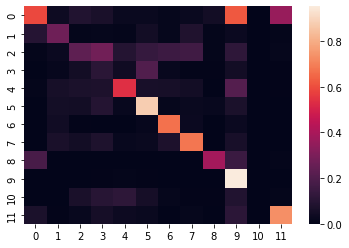

In [153]:
M = exec_test(model,tokenizer,dataset['test'])
w = np.sum(M,axis=1)
for i in range(w.shape[0]):
    if w[i] == 0:
        w[i] = 1
sns.heatmap(M/w)

---


Let's compare without the weighting :

In [154]:
exec_train(model,tokenizer,datasets.concatenate_datasets([dataset['train'],dataset['validation']]),False)

Training epoch 1: 100%|██████████| 957/957 [04:31<00:00,  3.53it/s, accuracy=0.597, loss=0.0377]


Test: 100%|██████████| 167/167 [00:13<00:00, 12.38it/s, accuracy=0.259]


test Acc: 0.25941893158388


<Axes: >

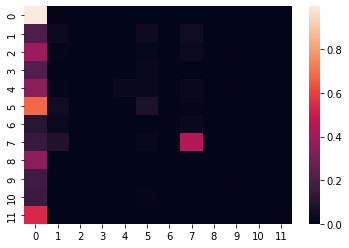

In [155]:
M = exec_test(model,tokenizer,dataset['test'])
w = np.sum(M,axis=1)
for i in range(w.shape[0]):
    if w[i] == 0:
        w[i] = 1
sns.heatmap(M/w)

### Dataset `vm2`

In [156]:
#Load Dataset
miam= '/content/drive/MyDrive/ANLP/projet_anlp/miam.py'
dataset = datasets.load_dataset('miam','vm2')

Generating train split:   0%|          | 0/25060 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2860 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2855 [00:00<?, ? examples/s]

Dataset miam downloaded and prepared to /root/.cache/huggingface/datasets/miam/vm2/1.0.0/3cb25c5337f9e60db1dc6d90344763a6ef79d7a4ac3c5f215ce6e8afe99db26c. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [157]:
num_labels = len(set(dataset['train']['Label']))

In [158]:
#Import model et tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', return_tensors='pt')
model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-cased',num_labels=num_labels, problem_type="single_label_classification")


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

---


Let's run the training and test with weighting :

In [159]:
exec_train(model,tokenizer,datasets.concatenate_datasets([dataset['train'],dataset['validation']]),True)

Map:   0%|          | 0/27920 [00:00<?, ? examples/s]

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


tensor([1.1076, 1.2211, 1.8017, 1.9157, 1.7947, 1.7888, 1.9383, 2.0333, 1.5246,
        2.8136, 1.8866, 2.4202, 2.2863, 2.0259, 1.0769, 1.6281, 2.5805, 1.0000,
        1.4508, 2.6316, 1.4840, 2.9274, 2.2391, 2.0064, 1.6468, 1.9456, 1.5827,
        2.5017, 1.6379, 1.0325, 2.2017], device='cuda:0')


Training epoch 1:  60%|██████    | 528/873 [02:29<01:37,  3.54it/s, accuracy=0.485, loss=0.0603]

KeyboardInterrupt: ignored

In [ ]:
M = exec_test(model,tokenizer,dataset['test'])
w = np.sum(M,axis=1)
for i in range(w.shape[0]):
    if w[i] == 0:
        w[i] = 1
sns.heatmap(M/w)

---


Let's compare without the weighting :

In [ ]:
exec_train(model,tokenizer,datasets.concatenate_datasets([dataset['train'],dataset['validation']]),False)

In [ ]:
M = exec_test(model,tokenizer,dataset['test'])
w = np.sum(M,axis=1)
for i in range(w.shape[0]):
    if w[i] == 0:
        w[i] = 1
sns.heatmap(M/w)

## Results

Here are the different results obtained for each dataset with the multilingual m-BERT model. We use here the metric `accuracy` (in %):


| Dataset name          | Language                                             | With weighting                |                         | Without weighting||
|--------------------------|----------------------------------------------------|--------------------------|--------------------------|-------------------------- | --------------------------|
|          |                                              | Train & Valid                 | Test                    |Train & Valid                 | Test                    |
|--------------------------|----------------------------------------------------|--------------------------|--------------------------|-------------------------- | --------------------------|
| dihana                   | Spanish                                           | 91.2                                   |95.0 |  94.1|94.0|   
| ilisten                  | Italian                                             | 52.2                     | 70.8                     |    77.2 |74.3|
| loria                    | French                                           | 68.6                             |76.3 |76.4|80.1                     |    
| maptask                  | English                                            | 55.0                             |56.1        |    59.7|       25.9|  
| vm2                      | German                                           | 49.8                           |53.3   |   
|--------------------------|----------------------------------------------------|--------------------------|--------------------------|--------------------------|--------------------------|
| **Total**                      |                                            | **63.9**                       |**70.9**   |   |. |
      
   


We only make one `epoch` for training our model, which avoids overfitting. In this case the `valid set` is not needed and we group the `train` and `valid` sets for training.



---
If we compare our results to the [original paper](https://aclanthology.org/2021.emnlp-main.656.pdf), we find similar results, with an average of **70.9% accuracy** for our model **vs.** **73.8%** for the original paper model.